# Data exploration (multivariate)

Here I'll perform a multivariate analysis on cleaned dataset. 

In [3]:
#libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os

In [4]:
DATA_CLEANED_DIR = os.path.join(os.getcwd(), os.pardir, 'data_sent_github')
print(DATA_CLEANED_DIR)

/work/churn_predictive_model/notebooks/../data_sent_github


In [5]:
df = pd.read_csv(DATA_CLEANED_DIR+'/cleaned_dataset.csv', index_col=[0])

In [6]:
#Let's make sure there're no duplicates
df.drop_duplicates(subset=['CustomerId'], keep='first', inplace=True)

In [7]:
df.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,...,birth_date_year,birth_date_month,birth_date_day,ContractId,Products,Date,Score,Value,eligible,client_age
0,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27,...,1979.0,2.0,2.0,WWlyRDX8AsGnWUPYiYGjidGKI,Product B,2019-06,683,0.00,0,40
1,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11,...,1974.0,7.0,7.0,orIBQM9pK7Z7AYBQok1jypK6t,Product D,2018-02,487,119657.24,0,43
3,15982728,GOUDEAU,France,Male,0.0,1.0,66465.09,2018-02-02,2019-06-01,1972-12-18,...,1972.0,12.0,12.0,sdnOZ3fBpu1sKsYrZJE9tfcRP,Product B,2018-02,595,43353.50,0,45
4,15434700,STIMMELL,Germany,Male,1.0,0.0,138615.32,2018-06-06,NaN,1994-07-22,...,1994.0,7.0,7.0,dF2Z2DZoUYMmf0ST8keQjvKQL,Product A,2018-06,706,92357.90,0,23
5,15898769,ALCOCK,Germany,Female,0.0,0.0,197095.28,2018-06-09,2019-06-16,1998-05-14,...,1998.0,5.0,5.0,gfCNu3alAqn2HgWKamcXqOaij,Product D,2018-06,532,0.00,0,20


In [8]:
#Transforming datetimes
df['application_date'] = pd.to_datetime(df['application_date'])
df['exit_date'] = pd.to_datetime(df['exit_date'])
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [9]:
df.dtypes

CustomerId                         int64
Surname                           object
Geography                         object
Gender                            object
HasCrCard                        float64
IsActiveMember                   float64
EstimatedSalary                  float64
application_date          datetime64[ns]
exit_date                 datetime64[ns]
birth_date                datetime64[ns]
application_date_year              int64
application_date_month             int64
application_date_day               int64
exit_date_year                   float64
exit_date_month                  float64
exit_date_day                    float64
birth_date_year                  float64
birth_date_month                 float64
birth_date_day                   float64
ContractId                        object
Products                          object
Date                              object
Score                              int64
Value                            float64
eligible        

In [12]:
sns.set_theme()

### Numeric variables

In [10]:
numeric_vars = ['EstimatedSalary', 'Score', 'Value', 'client_age']

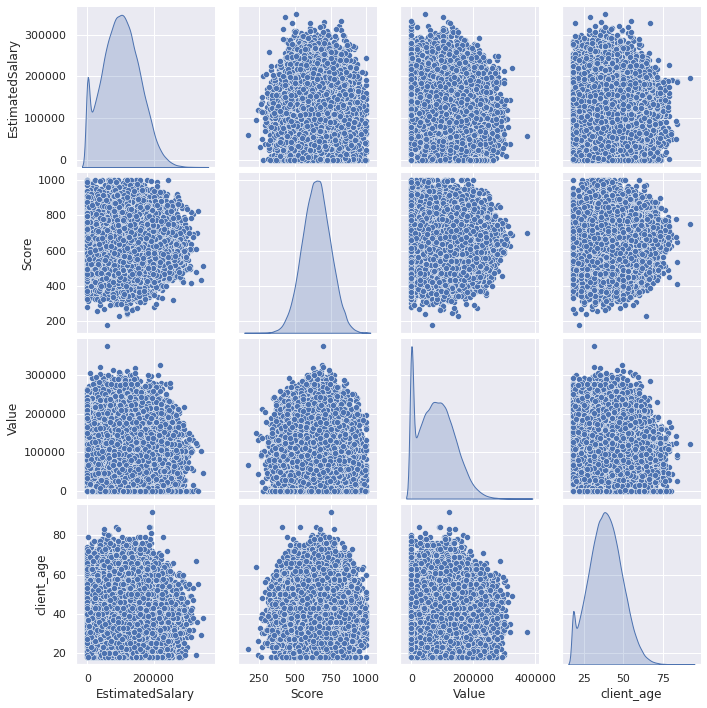

In [14]:
sns.pairplot(df[numeric_vars], diag_kind='kde') 

In [15]:
df[numeric_vars].corr()

,EstimatedSalary,Score,Value,client_age
EstimatedSalary,1.000000,-0.000196,-0.004326,-0.008493
Score,-0.000196,1.000000,-0.000932,-0.000542
Value,-0.004326,-0.000932,1.000000,-0.005866
client_age,-0.008493,-0.000542,-0.005866,1.000000


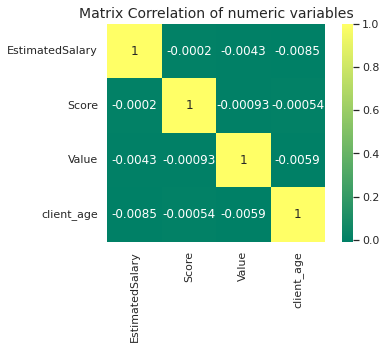

In [18]:
fig, ax = plt.subplots()

ax = sns.heatmap(df[numeric_vars].corr(), 
            annot=True,
            square=True,
            cmap='summer')

plt.title('Matrix Correlation of numeric variables', size=14)
plt.show()

Surprisingly, there's **no correlation among variables**.

### Categorical variables

In [19]:
df.dtypes

CustomerId                         int64
Surname                           object
Geography                         object
Gender                            object
HasCrCard                        float64
IsActiveMember                   float64
EstimatedSalary                  float64
application_date          datetime64[ns]
exit_date                 datetime64[ns]
birth_date                datetime64[ns]
application_date_year              int64
application_date_month             int64
application_date_day               int64
exit_date_year                   float64
exit_date_month                  float64
exit_date_day                    float64
birth_date_year                  float64
birth_date_month                 float64
birth_date_day                   float64
ContractId                        object
Products                          object
Date                              object
Score                              int64
Value                            float64
eligible        

In [20]:
categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Products', 'eligible']

In [29]:
df.groupby(['Geography'])['EstimatedSalary'].median()

Geography
France      99698.200
Germany    100463.085
Spain      100721.975
Name: EstimatedSalary, dtype: float64

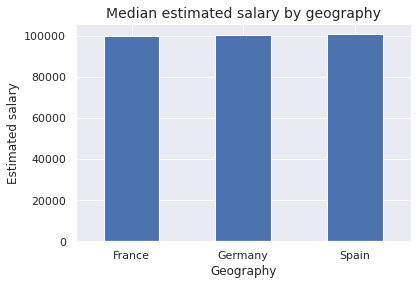

In [33]:
fig, ax = plt.subplots()
ax = df.groupby(['Geography'])['EstimatedSalary'].median().plot.bar(rot=0)
plt.title('Median estimated salary by geography', size=14)
plt.ylabel('Estimated salary')
plt.show()

In [38]:
df.groupby(['Geography'])['client_age'].median()

Geography
France     38
Germany    38
Spain      38
Name: client_age, dtype: int64

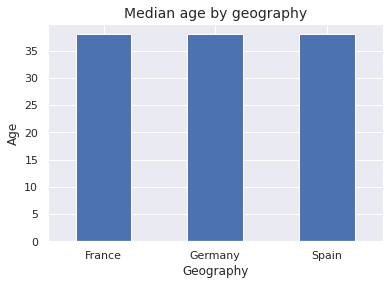

In [39]:
fig, ax = plt.subplots()
ax = df.groupby(['Geography'])['client_age'].median().plot.bar(rot=0)
plt.title('Median age by geography', size=14)
plt.ylabel('Age')
plt.show()

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>

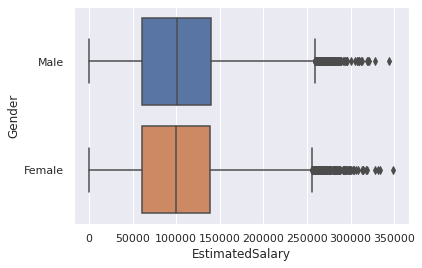

In [22]:
sns.boxplot(data=df, x='EstimatedSalary', y='Gender')

* When considering categories, data seem to be evenly distributed.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb2ec55e-ada8-4de4-93de-2d05f236c13b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>